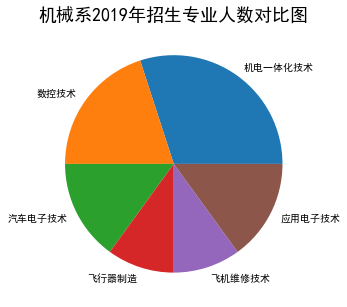

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['SimHei']
data = [30,20,15,10,10,15]
plt.figure(num=1,figsize=(5,5))
plt.title('机械系2019年招生专业人数对比图',size = 18)
plt.pie(data,labels=('机电一体化技术','数控技术','汽车电子技术','飞行器制造','飞机维修技术','应用电子技术'))
plt.show()

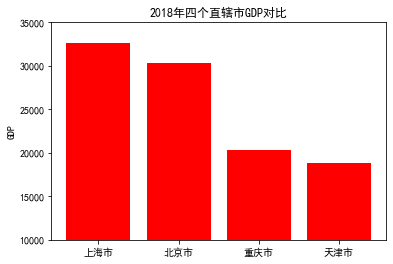

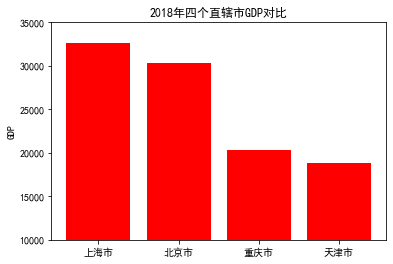

In [4]:
GDP =[32679,30320,20363,18809]
plt.rcParams['font.sans-serif']=['SimHei']
plt.bar(range(4),GDP,align='center',color='red',alpha=1)
plt.ylabel('GDP')
plt.title('2018年四个直辖市GDP对比')
plt.xticks(range(4),["上海市","北京市",'重庆市','天津市'])
plt.ylim([10000,35000])
plt.show()

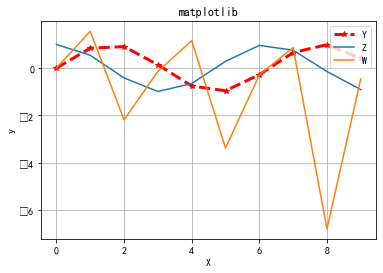

In [5]:
x = np.arange(10)
y = np.sin(x)
z = np.cos(x)
w = np.tan(x)
plt.rcParams['font.sans-serif']=['SimHei']
plt.plot(x,y,marker='*',linewidth = 3,linestyle='--',color='red')
plt.plot(x,z)
plt.plot(x,w)
plt.title('matplotlib')
plt.xlabel('X')
plt.ylabel("y")
plt.legend(["Y","Z","W"],loc = 'upper right')
plt.grid(True)
plt.show()

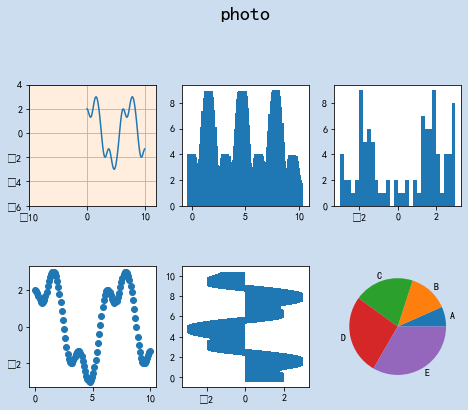

In [6]:
x= np.linspace(0,10,100)
y = 2*np.cos(x)**5+3*np.sin(x)**3
fig,axes = plt.subplots(2,3,figsize = (10,6),facecolor='#ccddef')
fig.suptitle("photo",fontsize = 20)
axes[0,0].plot(x,y)
axes[0,1].bar(x,y*y)
axes[0,2].hist(y,bins=30)
axes[1,0].scatter(x,y)
axes[1,1].barh(x,y)
axes[1,2].pie([1,2,3,4,5],labels=['A','B','C','D','E'])
ax1 = axes[0,0]
ax1.set(xlim = [-10,12],ylim=[-6,4],facecolor='#ffeedd')
ax1.grid(True)
fig.subplots_adjust(left = 0.2,bottom = 0.1,right=0.8,top=0.8,hspace=0.5)
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()

In [6]:
import requests  
from lxml import etree  
import pymysql  
  
db = pymysql.connect(host='localhost', user='root', password='strongs', db='house', port=3306, charset='utf8')  
conn = db.cursor()  
conn.execute('set names utf8')  
  
province_list = ['北京', '上海', '重庆', '天津', '甘肃', '青海', '四川', '河北', '云南', '贵州', '湖北', '河', '山东', '江苏', '安徽', '浙江', '江西',  
                 '福建', '广东', '湖南', '海南', '辽宁', '吉林', '黑龙江', '山西', '内蒙古', '广西', '宁夏', '新疆', '台湾']  
for province in province_list:  
    for i in range(2008, 2019):  
        for j in range(1, 13):  
            url = 'http://172.20.150.50:40000/fangjia?province={0}&year={1}&month={2}'.format(str(province), i, j)  
            htmlstr = requests.get(url).text  
            if '区房价行情，房价概况走势，数据分析' in htmlstr:  
                etree_html = etree.HTML(htmlstr)  
                trlist = etree_html.xpath('//tbody/tr[position()>1]')  
                for trone in trlist:  
                    city_name = trone.xpath('th[2]/a/text()')[0]  
                    house_price = trone.xpath('th[3]/text()')[0]  
                    t = [province, city_name, house_price, i, j, url]  
                    sql = u"INSERT INTO house_price(province,city,price,year,month,url) VALUES(%s,%s,%s,'%s','%s',%s)"  
                    conn.execute(sql, t)  
                    db.commit()  
                    print("insert success")  
  
conn.close()  
db.close()  